#Simulate a stationary moving average level 2 process (MA(2) process), using the ArmaProcess function from the statsmodels library

Prerequisites

In [18]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

Step 1: Generate the MA(2) process

In [19]:
np.random.seed(22)
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

simulated_data = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
print(simulated_data[:10])

[-0.09194992 -1.54610558 -0.26280888  0.29528215 -0.38198428 -1.51608578
 -0.13056205 -0.57737435 -0.09112898 -0.3287593 ]


Step 2: Plot your simulated moving average

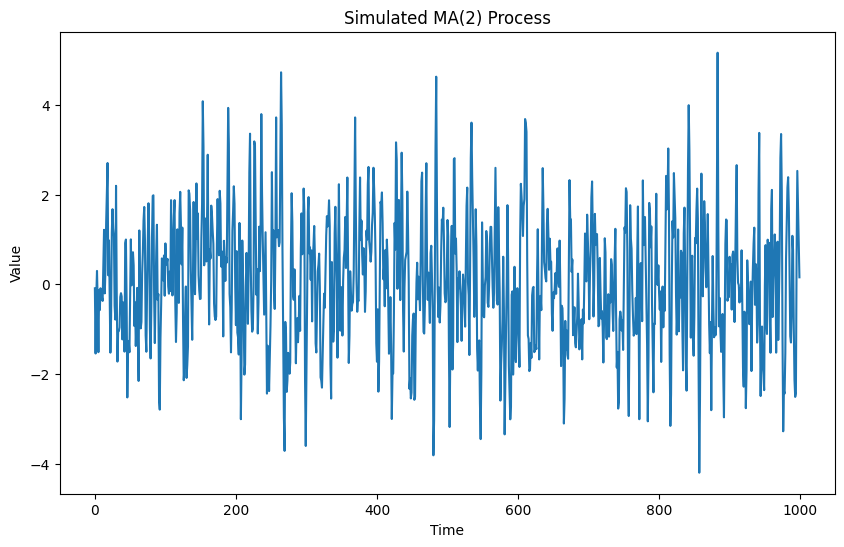

In [20]:
plt.figure(figsize=(10, 6))  # Optional: set the size of the plot
plt.plot(simulated_data)
plt.title("Simulated MA(2) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

Step 3: Run the Augmented Dickey-Fuller (ADF) test, and check if the process is stationary

In [21]:
adf_test = adfuller(simulated_data)
adf_stat = adf_test[0]
p_value = adf_test[1]

print("ADF Test Statistic:", adf_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Test Statistic: -11.413115066533098
p-value: 7.169601894101729e-21
The time series is stationary.


Question 4: Plot the AutoCorrelation Function (ACF), and check for significant coefficients after lag 2

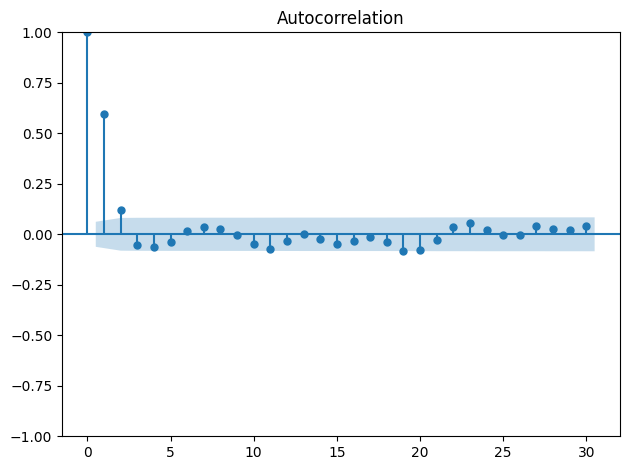

In [22]:
plot_acf(simulated_data, lags=30)
plt.tight_layout()
plt.show()

There are no significant coefficients after lag 2. The first two lags (lag 0 and 1) are outside the shaded area (the confidence level). Lag 2 is just above the shaded area. After lag 2 the others fall within the shaded area, meaning they're not significant. 